In [2]:
import random
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

lower_bust=31.235
higher_profit=63.208

sampleSize=100

startingFunds=10000
wagerSize=100
wagerCount=1000

def rollDice():
    roll=random.randint(1,100)
    
    if roll == 100:
        #print (roll, 'roll was 100, you lose. What are the odds?! Play again')
        return False
    elif roll<50:
        #print(roll, 'roll was 1-50, you lose. Play again!')
        return False
    elif 100>roll>=50:
        #print(roll, 'roll was 51-99, you win!')
        return True

In [66]:
def simple_bettor(funds, initial_wager, wager_count, color):
    global simple_busts
    global simple_profits
    value=funds
    wager=initial_wager
    
    wX=[]
    vY=[]
    
    currentWager=1
    
    while currentWager<=wager_count:
        if rollDice():
            value+=wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value-=wager
            wX.append(currentWager)
            vY.append(value)
        
        currentWager+=1
        
    if value<=0:
        simple_busts+=1
    
    if value>funds:
        simple_profits+=1 
    #print('Funds:', value)
    
    plt.plot(wX,vY, color)
    
    

In [67]:
def doubler_bettor(funds, initial_wager, wager_count, color):
    value=funds
    wager=initial_wager
    global doubler_busts
    global doubler_profits
    wX=[]
    vY=[]
    
    currentWager=1
    previousWager='win'
    previousWagerAmount=initial_wager
    
    while currentWager<=wager_count:
        if previousWager=='win':
            #print('You won the last wager, great')
            if rollDice():
                value+=wager
                #print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value-=wager
                previousWager='loss'
                #print(value)
                previousWagerAmount=wager
                wX.append(currentWager)
                vY.append(value)
            if value<0:
                #print('You went broke after ', currentWager, 'bets' )
                doubler_busts+=1
                break
        elif previousWager=='loss':
            #print('You lost the last wager, play again and double it')
            wager=previousWagerAmount*2
            if (value-wager)<0:
                wager=value
                
            if rollDice():
                #print('we won ', wager)
                value+=wager
                #print(value)
                #if we win we go back to initial amount
                wager=initial_wager
                previousWager='win'
                wX.append(currentWager)
                vY.append(value)
            else:
                #print('You lost ', wager)
                value-=wager
                #print(value)
                previousWagerAmount=wager
                wX.append(currentWager)
                vY.append(value)
                if value<=0:
                    #print('You went broke after ', currentWager, ' bets')
                    doubler_busts+=1
                    break
        currentWager+=1
        

    if value>funds:
        doubler_profits+=1
    
    plt.plot(wX,vY, color)
    
                

<IPython.core.display.Javascript object>


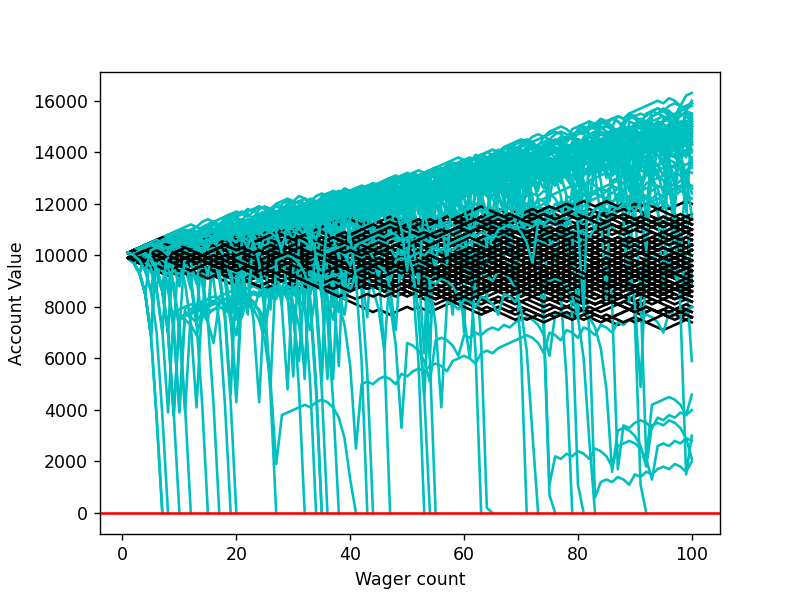

Simple Bettor bust chance:  0.0
Doubler Bettor bust chance: 32.0
Simple Bettor profit chances:  34.0
Doubler Bettor profit chances:  57.99999999999999


In [68]:
x=0
simple_profits=0.0
simple_busts=0.0
doubler_profits=0.0
doubler_busts=0.0

#simulation of 1000 different bettor outcomes
while x<sampleSize:
    simple_bettor(startingFunds,wagerSize,wagerCount, 'k')
    doubler_bettor(startingFunds,wagerSize,wagerCount, 'c')
    x+=1

print ('Simple Bettor bust chance: ', simple_busts/sampleSize*100.00)
print ('Doubler Bettor bust chance:', doubler_busts/sampleSize*100.00)

print('Simple Bettor profit chances: ', (simple_profits/sampleSize)*100.00)
print('Doubler Bettor profit chances: ', (doubler_profits/sampleSize)*100.00)

plt.ylabel('Account Value')
plt.xlabel('Wager count')
plt.axhline(0, color='r')
plt.show()

In [24]:
def multiple_bettor(funds, initial_wager, wager_count):
    global multiple_busts
    global multiple_profits
    
    value=funds
    wager=initial_wager
    wX=[]
    vY=[]
    
    currentWager=1
    previousWager='win'
    previousWagerAmount=initial_wager
    
    while currentWager<=wager_count:
        if previousWager=='win':
            #print('You won the last wager, great')
            if rollDice():
                value+=wager
                #print(value)
                wX.append(currentWager)
                vY.append(value)
            else:
                value-=wager
                previousWager='loss'
                #print(value)
                previousWagerAmount=wager
                wX.append(currentWager)
                vY.append(value)
            if value<0:
                #print('You went broke after ', currentWager, 'bets' )
                multiple_busts+=1
                break
        elif previousWager=='loss':
            #print('You lost the last wager, play again and double it')
            wager=previousWagerAmount*random_multiple
            if (value-wager)<0:
                wager=value
                
            if rollDice():
                #print('we won ', wager)
                value+=wager
                #print(value)
                #if we win we go back to initial amount
                wager=initial_wager
                previousWager='win'
                wX.append(currentWager)
                vY.append(value)
            else:
                #print('You lost ', wager)
                value-=wager
                #print(value)
                previousWagerAmount=wager
                wX.append(currentWager)
                vY.append(value)
                if value<=0:
                    #print('You went broke after ', currentWager, ' bets')
                    multiple_busts+=1
                    break
        currentWager+=1
        

    if value>funds:
        multiple_profits+=1

In [35]:
k=0
while k<=100:
    multiple_profits=0.0
    multiple_busts=0.0
    multipleSampSize=1000
    currentSample=1
    
    random_multiple=random.uniform(0.1,10.0)
    
    while currentSample<=multipleSampSize:
        multiple_bettor(startingFunds,wagerSize,wagerCount)
        currentSample+=1
       
    k+=1
    if (multiple_busts/multipleSampSize*100.00<lower_bust)and(multiple_profits/multipleSampSize*100.00>higher_profit):
        print('#################')
        print('Found a winner, the multiple was: ', random_multiple)
        print('Lower bust to beat ', lower_bust)
        print('Higher profit rate to beat ', higher_profit)
        print('Bust rate: ', multiple_busts/multipleSampSize*100.00)
        print('Profit: ', multiple_profits/multipleSampSize*100.00)
        print('#################')
    
    

#################
Found a winner, the multiple was:  1.510828193373998
Lower bust to beat  31.235
Higher profit rate to beat  63.208
Bust rate:  7.6
Profit:  63.800000000000004
#################
#################
Found a winner, the multiple was:  1.5480080770974745
Lower bust to beat  31.235
Higher profit rate to beat  63.208
Bust rate:  13.200000000000001
Profit:  63.4
#################


In [15]:
def dAlembert(funds, initial_wager, wager_count):
    global da_busts
    global da_profits
    global returnRate
    value=funds
    wager=initial_wager
    currentWager=1
    previousWager='win'
    previousWagerAmount=initial_wager
    
    while currentWager<=wager_count:
        if previousWager=='win':
            if wager==initial_wager:
                pass
            else:
                wager-=initial_wager
                previousWagerAmount=wager
                #print('current wager: ', wager, 'value: ', value)
            if rollDice():
                value+=wager
                #print('we won, current value: ', value)
            else:
                value-=wager
                previousWager='loss'
                #print('we lost, current value: ', value)
                if value<=0:
                    da_busts+=1
                    break
                    
                    
        elif previousWager=='loss':
            wager=previousWagerAmount+initial_wager
            if (value-wager)<=0:
                wager=value
            previousWagerAmount=wager
            
            #print('lost last wager, current wager: ', wager, 'value: ', value)
            if rollDice():
                value+=wager
                previousWager='win'
                #print('we won, current value: ', value)
            else:
                value-=wager
                #print('we lost, current value: ', value)
                if value<=0:
                    da_busts+=1
                    break
        currentWager+=1
        
    if value>funds:
        da_profits+=1
            
    #print(value)
    returnRate+=value
    

<IPython.core.display.Javascript object>


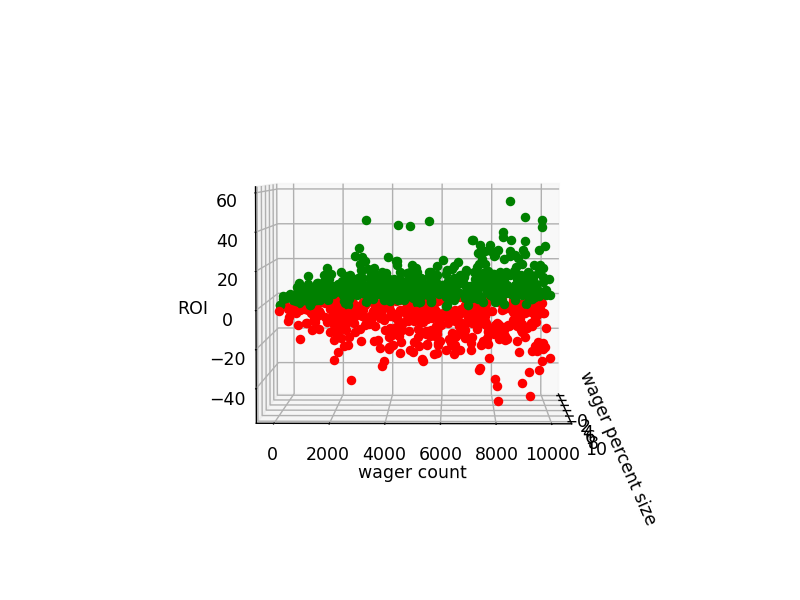

In [3]:
import csv

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

def graph():
    with open('monteCarloLiberal.csv','r') as montecarlo:
        datas=csv.reader(montecarlo, delimiter=',')
        
        for eachLine in datas:
            ROI=float(eachLine[0])
            wagerSizePercent=float(eachLine[1])
            wagerCount=float(eachLine[2])
            pcolor=eachLine[3]
            
            ax.scatter(wagerSizePercent, wagerCount, ROI, color=pcolor)
            ax.set_xlabel('wager percent size')
            ax.set_ylabel('wager count')
            ax.set_zlabel('ROI')
    plt.show()

In [20]:
startingFunds=100000
x=0
while x<1000:
    wagerSize=random.uniform(1.0,10000.00)
    wagerCount=random.uniform(10.0,10000)

    returnRate=0
    da_profits=0
    da_busts=0
    dASampSize=10000
    currentSample=1 
    
    while currentSample<=dASampSize:
        dAlembert(startingFunds, wagerSize, wagerCount)
        currentSample+=1
        
    ROI=(returnRate-(dASampSize*startingFunds))/(dASampSize*startingFunds)*100
    x+=1
    
    wagerSizePercent=wagerSize/startingFunds*100.00
    
    if ROI>1:
        print('----------------------------------------------')
        print('Total invested: ', dASampSize*startingFunds)
        print('Total Return: ', returnRate)
        print('ROI ', ROI)
        print('Bust rate: ', da_busts/dASampSize*100)
        print('Profit rate: ', da_profits/dASampSize*100)
        print('wager size: ',wagerSize)
        print('wager count: ',wagerCount)
        print('wager size  percentage: ', wagerSizePercent)
        
        saveFile=open('monteCarloLiberal.csv','a')
        saveLine='\n'+str(ROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',g'
        saveFile.write(saveLine)
        saveFile.close()
    elif ROI<-1:
        print('----------------------------------------------')
        print('Total invested: ', dASampSize*startingFunds)
        print('Total Return: ', returnRate)
        print('ROI ', ROI)
        print('Bust rate: ', da_busts/dASampSize*100)
        print('Profit rate: ', da_profits/dASampSize*100)
        print('wager size: ',wagerSize)
        print('wager count: ',wagerCount)
        print('wager size  percentage: ', wagerSizePercent)
        
        saveFile=open('monteCarloLiberal.csv','a')
        saveLine='\n'+str(ROI)+','+str(wagerSizePercent)+','+str(wagerCount)+',r'
        saveFile.write(saveLine)
        saveFile.close()

----------------------------------------------
Total invested:  1000000000
Total Return:  575693192.8387398
ROI  -42.43068071612603
Bust rate:  99.58
Profit rate:  0.42
wager size:  7795.694029089809
wager count:  8099.07785341599
wager size  percentage:  7.795694029089809
----------------------------------------------
Total invested:  1000000000
Total Return:  1089320232.4550157
ROI  8.932023245501567
Bust rate:  99.39
Profit rate:  0.61
wager size:  8903.056011750381
wager count:  5777.532797653128
wager size  percentage:  8.903056011750381
----------------------------------------------
Total invested:  1000000000
Total Return:  1016964966.5288765
ROI  1.6964966528876544
Bust rate:  87.44
Profit rate:  12.509999999999998
wager size:  588.8025853169361
wager count:  3366.9788182166
wager size  percentage:  0.5888025853169361
----------------------------------------------
Total invested:  1000000000
Total Return:  880345215.0409174
ROI  -11.965478495908261
Bust rate:  99.3
Profit rate:

----------------------------------------------
Total invested:  1000000000
Total Return:  926016128.1550293
ROI  -7.39838718449707
Bust rate:  96.95
Profit rate:  3.04
wager size:  990.0937178616242
wager count:  8916.006462796244
wager size  percentage:  0.9900937178616241
----------------------------------------------
Total invested:  1000000000
Total Return:  704984652.6345417
ROI  -29.501534736545825
Bust rate:  99.17
Profit rate:  0.83
wager size:  6692.376412214302
wager count:  5270.69972663706
wager size  percentage:  6.692376412214301
----------------------------------------------
Total invested:  1000000000
Total Return:  1153968230.144101
ROI  15.39682301441009
Bust rate:  99.19
Profit rate:  0.8099999999999999
wager size:  5152.499343910336
wager count:  7594.0830003750425
wager size  percentage:  5.152499343910336
----------------------------------------------
Total invested:  1000000000
Total Return:  1189160963.1467679
ROI  18.916096314676786
Bust rate:  99.48
Profit rat

----------------------------------------------
Total invested:  1000000000
Total Return:  1037810069.9214772
ROI  3.78100699214772
Bust rate:  98.57000000000001
Profit rate:  1.43
wager size:  4451.919849237865
wager count:  5893.507676165333
wager size  percentage:  4.451919849237865
----------------------------------------------
Total invested:  1000000000
Total Return:  1108346800.0934663
ROI  10.834680009346629
Bust rate:  98.66
Profit rate:  1.3299999999999998
wager size:  3319.3063902967006
wager count:  7312.376843911794
wager size  percentage:  3.319306390296701
----------------------------------------------
Total invested:  1000000000
Total Return:  1157687099.7172635
ROI  15.768709971726347
Bust rate:  99.19
Profit rate:  0.8099999999999999
wager size:  6653.260234581494
wager count:  7628.815027715546
wager size  percentage:  6.653260234581494
----------------------------------------------
Total invested:  1000000000
Total Return:  1026172063.5921812
ROI  2.6172063592181205


----------------------------------------------
Total invested:  1000000000
Total Return:  852764535.2428678
ROI  -14.723546475713217
Bust rate:  99.02
Profit rate:  0.97
wager size:  6373.283974111343
wager count:  5423.207254743652
wager size  percentage:  6.373283974111343
----------------------------------------------
Total invested:  1000000000
Total Return:  1016070704.4616843
ROI  1.6070704461684344
Bust rate:  92.72
Profit rate:  7.26
wager size:  418.52596010024774
wager count:  8558.033698163483
wager size  percentage:  0.41852596010024773
----------------------------------------------
Total invested:  1000000000
Total Return:  1144071020.7428827
ROI  14.407102074288272
Bust rate:  97.22
Profit rate:  2.77
wager size:  5397.096918076689
wager count:  2521.0041905160656
wager size  percentage:  5.397096918076689
----------------------------------------------
Total invested:  1000000000
Total Return:  1151015128.734853
ROI  15.101512873485303
Bust rate:  98.83999999999999
Profit

----------------------------------------------
Total invested:  1000000000
Total Return:  1088212717.0194707
ROI  8.821271701947069
Bust rate:  99.44
Profit rate:  0.5599999999999999
wager size:  8702.958357260824
wager count:  6439.439740311292
wager size  percentage:  8.702958357260824
----------------------------------------------
Total invested:  1000000000
Total Return:  988980628.7024888
ROI  -1.101937129751122
Bust rate:  94.74000000000001
Profit rate:  5.26
wager size:  630.3891436905271
wager count:  7573.0623076589045
wager size  percentage:  0.6303891436905271
----------------------------------------------
Total invested:  1000000000
Total Return:  1010332414.6326637
ROI  1.0332414632663727
Bust rate:  97.92
Profit rate:  2.08
wager size:  1909.6712315978068
wager count:  7914.809485544939
wager size  percentage:  1.9096712315978068
----------------------------------------------
Total invested:  1000000000
Total Return:  963080947.9026564
ROI  -3.6919052097343563
Bust rate: 

----------------------------------------------
Total invested:  1000000000
Total Return:  1146843483.3224733
ROI  14.68434833224733
Bust rate:  97.78
Profit rate:  2.21
wager size:  3274.3925294780647
wager count:  5048.464326879164
wager size  percentage:  3.2743925294780643
----------------------------------------------
Total invested:  1000000000
Total Return:  911295299.4588631
ROI  -8.870470054113685
Bust rate:  98.16
Profit rate:  1.8399999999999999
wager size:  4464.733884852149
wager count:  3219.938072761766
wager size  percentage:  4.464733884852149
----------------------------------------------
Total invested:  1000000000
Total Return:  1031158730.7821039
ROI  3.1158730782103894
Bust rate:  98.3
Profit rate:  1.7000000000000002
wager size:  3853.3618343805942
wager count:  5361.289728294213
wager size  percentage:  3.853361834380594
----------------------------------------------
Total invested:  1000000000
Total Return:  939007005.113728
ROI  -6.099299488627195
Bust rate:  8

----------------------------------------------
Total invested:  1000000000
Total Return:  1027467966.4133744
ROI  2.7467966413374425
Bust rate:  95.28999999999999
Profit rate:  4.71
wager size:  2785.864719113905
wager count:  2436.0423881302063
wager size  percentage:  2.785864719113905
----------------------------------------------
Total invested:  1000000000
Total Return:  1119845174.5703635
ROI  11.984517457036352
Bust rate:  98.94
Profit rate:  1.06
wager size:  7988.547653425799
wager count:  4866.890763339083
wager size  percentage:  7.988547653425798
----------------------------------------------
Total invested:  1000000000
Total Return:  920428234.1510161
ROI  -7.957176584898389
Bust rate:  96.41999999999999
Profit rate:  3.55
wager size:  9299.50376760663
wager count:  1112.1009800376091
wager size  percentage:  9.299503767606629
----------------------------------------------
Total invested:  1000000000
Total Return:  1177785574.056586
ROI  17.778557405658603
Bust rate:  99.2

----------------------------------------------
Total invested:  1000000000
Total Return:  1047640296.5767653
ROI  4.76402965767653
Bust rate:  88.52
Profit rate:  11.200000000000001
wager size:  9471.328899575223
wager count:  253.26383409056902
wager size  percentage:  9.471328899575223
----------------------------------------------
Total invested:  1000000000
Total Return:  1116911567.6357183
ROI  11.691156763571835
Bust rate:  98.72999999999999
Profit rate:  1.27
wager size:  2187.3493099908374
wager count:  9975.294739808776
wager size  percentage:  2.187349309990837
----------------------------------------------
Total invested:  1000000000
Total Return:  1424834634.7120478
ROI  42.48346347120478
Bust rate:  98.91
Profit rate:  1.09
wager size:  9471.485670694898
wager count:  4890.651808157584
wager size  percentage:  9.471485670694896
----------------------------------------------
Total invested:  1000000000
Total Return:  1027658179.6905473
ROI  2.7658179690547344
Bust rate:  60

----------------------------------------------
Total invested:  1000000000
Total Return:  836541760.3487283
ROI  -16.34582396512717
Bust rate:  98.44000000000001
Profit rate:  1.5599999999999998
wager size:  4092.7385500940127
wager count:  4481.470651939003
wager size  percentage:  4.092738550094013
----------------------------------------------
Total invested:  1000000000
Total Return:  983339605.6323501
ROI  -1.6660394367649913
Bust rate:  97.95
Profit rate:  2.0500000000000003
wager size:  5890.79928432128
wager count:  2839.839742340815
wager size  percentage:  5.89079928432128
----------------------------------------------
Total invested:  1000000000
Total Return:  1017915732.2229168
ROI  1.7915732222916843
Bust rate:  99.13
Profit rate:  0.8699999999999999
wager size:  5868.234719263297
wager count:  7405.67106298706
wager size  percentage:  5.868234719263297
----------------------------------------------
Total invested:  1000000000
Total Return:  960332624.8817209
ROI  -3.96673

----------------------------------------------
Total invested:  1000000000
Total Return:  974732154.7176213
ROI  -2.5267845282378674
Bust rate:  91.62
Profit rate:  8.3
wager size:  2229.5184154233266
wager count:  1276.8033524822713
wager size  percentage:  2.2295184154233265
----------------------------------------------
Total invested:  1000000000
Total Return:  827593719.4920605
ROI  -17.240628050793948
Bust rate:  98.89
Profit rate:  1.11
wager size:  2945.7943932886606
wager count:  9114.540002707901
wager size  percentage:  2.9457943932886606
----------------------------------------------
Total invested:  1000000000
Total Return:  894851798.6472508
ROI  -10.514820135274922
Bust rate:  96.32
Profit rate:  3.6700000000000004
wager size:  2748.664439675038
wager count:  2270.0696756662387
wager size  percentage:  2.748664439675038
----------------------------------------------
Total invested:  1000000000
Total Return:  964048923.4444575
ROI  -3.595107655554247
Bust rate:  97.0
Prof

----------------------------------------------
Total invested:  1000000000
Total Return:  765290840.2423707
ROI  -23.470915975762928
Bust rate:  99.46000000000001
Profit rate:  0.53
wager size:  6253.666336390393
wager count:  9911.91738446787
wager size  percentage:  6.253666336390393
----------------------------------------------
Total invested:  1000000000
Total Return:  931606107.6448683
ROI  -6.839389235513174
Bust rate:  99.55000000000001
Profit rate:  0.44999999999999996
wager size:  9941.821291042226
wager count:  6718.218659776902
wager size  percentage:  9.941821291042226
----------------------------------------------
Total invested:  1000000000
Total Return:  1084649761.622933
ROI  8.464976162293292
Bust rate:  98.06
Profit rate:  1.94
wager size:  7980.553706059963
wager count:  2649.551716250155
wager size  percentage:  7.980553706059963
----------------------------------------------
Total invested:  1000000000
Total Return:  1055306759.6400528
ROI  5.53067596400528
Bust r

----------------------------------------------
Total invested:  1000000000
Total Return:  1120935763.2700505
ROI  12.093576327005053
Bust rate:  97.21
Profit rate:  2.77
wager size:  2069.940373717019
wager count:  5766.167317270717
wager size  percentage:  2.069940373717019
----------------------------------------------
Total invested:  1000000000
Total Return:  1127448073.9437926
ROI  12.74480739437926
Bust rate:  98.16
Profit rate:  1.8399999999999999
wager size:  3674.072416270113
wager count:  5501.1546890311565
wager size  percentage:  3.6740724162701133
----------------------------------------------
Total invested:  1000000000
Total Return:  913147117.7828923
ROI  -8.685288221710765
Bust rate:  97.78999999999999
Profit rate:  2.1999999999999997
wager size:  2754.639170550268
wager count:  4960.276924825576
wager size  percentage:  2.7546391705502677
----------------------------------------------
Total invested:  1000000000
Total Return:  1328501876.6576538
ROI  32.85018766576538

----------------------------------------------
Total invested:  1000000000
Total Return:  1026019156.1485431
ROI  2.601915614854312
Bust rate:  96.28999999999999
Profit rate:  3.6999999999999997
wager size:  2712.351971627462
wager count:  3235.256381498716
wager size  percentage:  2.712351971627462
----------------------------------------------
Total invested:  1000000000
Total Return:  1052576020.5946311
ROI  5.257602059463108
Bust rate:  81.92
Profit rate:  17.78
wager size:  3382.610604663991
wager count:  469.9441413225474
wager size  percentage:  3.382610604663991
----------------------------------------------
Total invested:  1000000000
Total Return:  1078538466.6558304
ROI  7.8538466655830375
Bust rate:  98.68
Profit rate:  1.32
wager size:  7099.951212646128
wager count:  4095.0602913596476
wager size  percentage:  7.099951212646127
----------------------------------------------
Total invested:  1000000000
Total Return:  1082313744.2782073
ROI  8.23137442782073
Bust rate:  93.

----------------------------------------------
Total invested:  1000000000
Total Return:  840504979.266154
ROI  -15.949502073384595
Bust rate:  98.44000000000001
Profit rate:  1.55
wager size:  1867.9213023290977
wager count:  7756.561027808421
wager size  percentage:  1.8679213023290977
----------------------------------------------
Total invested:  1000000000
Total Return:  926383826.9916445
ROI  -7.36161730083555
Bust rate:  98.63
Profit rate:  1.37
wager size:  4035.1766420704203
wager count:  6115.559920724372
wager size  percentage:  4.035176642070421
----------------------------------------------
Total invested:  1000000000
Total Return:  769182857.8740195
ROI  -23.08171421259805
Bust rate:  99.05000000000001
Profit rate:  0.95
wager size:  5829.059561237578
wager count:  5896.9705196641835
wager size  percentage:  5.829059561237578
----------------------------------------------
Total invested:  1000000000
Total Return:  1035408010.7379216
ROI  3.5408010737921596
Bust rate:  94.

----------------------------------------------
Total invested:  1000000000
Total Return:  1188650507.997062
ROI  18.865050799706196
Bust rate:  99.13
Profit rate:  0.8699999999999999
wager size:  5236.46988654306
wager count:  7343.5529781434525
wager size  percentage:  5.236469886543061
----------------------------------------------
Total invested:  1000000000
Total Return:  1010139854.3028371
ROI  1.0139854302837135
Bust rate:  93.10000000000001
Profit rate:  6.83
wager size:  7279.987600241725
wager count:  695.2857072996155
wager size  percentage:  7.279987600241725
----------------------------------------------
Total invested:  1000000000
Total Return:  674804850.4242405
ROI  -32.51951495757595
Bust rate:  99.72
Profit rate:  0.27999999999999997
wager size:  9898.865566635424
wager count:  9214.924676913555
wager size  percentage:  9.898865566635424
----------------------------------------------
Total invested:  1000000000
Total Return:  1063617272.133285
ROI  6.361727213328505
Bu

----------------------------------------------
Total invested:  1000000000
Total Return:  1241646728.2845948
ROI  24.164672828459477
Bust rate:  98.55000000000001
Profit rate:  1.4500000000000002
wager size:  3305.880431193361
wager count:  8065.491502818075
wager size  percentage:  3.3058804311933607
----------------------------------------------
Total invested:  1000000000
Total Return:  948314541.842911
ROI  -5.1685458157088995
Bust rate:  98.83999999999999
Profit rate:  1.16
wager size:  6659.446592254648
wager count:  4313.60515740694
wager size  percentage:  6.659446592254648
----------------------------------------------
Total invested:  1000000000
Total Return:  1012150480.7702993
ROI  1.2150480770299317
Bust rate:  77.19
Profit rate:  22.5
wager size:  98.64741920280825
wager count:  9392.914645927965
wager size  percentage:  0.09864741920280824
----------------------------------------------
Total invested:  1000000000
Total Return:  1097064941.069175
ROI  9.7064941069175
Bust

----------------------------------------------
Total invested:  1000000000
Total Return:  978893458.8665085
ROI  -2.1106541133491517
Bust rate:  97.48
Profit rate:  2.5100000000000002
wager size:  1974.9152860712998
wager count:  6149.518372620854
wager size  percentage:  1.9749152860712997
----------------------------------------------
Total invested:  1000000000
Total Return:  909115921.9917923
ROI  -9.088407800820768
Bust rate:  98.08
Profit rate:  1.92
wager size:  7034.229783865553
wager count:  2685.4443526435507
wager size  percentage:  7.034229783865554
----------------------------------------------
Total invested:  1000000000
Total Return:  936418736.6073756
ROI  -6.358126339262437
Bust rate:  99.03999999999999
Profit rate:  0.96
wager size:  4631.545276476316
wager count:  6072.223676830065
wager size  percentage:  4.631545276476316
----------------------------------------------
Total invested:  1000000000
Total Return:  1211014996.118037
ROI  21.101499611803696
Bust rate:  9

----------------------------------------------
Total invested:  1000000000
Total Return:  1027018685.0959957
ROI  2.7018685095995663
Bust rate:  95.65
Profit rate:  4.34
wager size:  1797.1942253613686
wager count:  4026.0346346415145
wager size  percentage:  1.7971942253613686
----------------------------------------------
Total invested:  1000000000
Total Return:  898079426.0518496
ROI  -10.19205739481504
Bust rate:  98.85000000000001
Profit rate:  1.15
wager size:  3987.72787072844
wager count:  7277.311826595273
wager size  percentage:  3.98772787072844
----------------------------------------------
Total invested:  1000000000
Total Return:  1208848979.4787996
ROI  20.884897947879956
Bust rate:  97.75
Profit rate:  2.25
wager size:  6199.037732368702
wager count:  2952.592482086412
wager size  percentage:  6.199037732368701
----------------------------------------------
Total invested:  1000000000
Total Return:  1190586820.4094274
ROI  19.058682040942738
Bust rate:  99.229999999999

----------------------------------------------
Total invested:  1000000000
Total Return:  1016407338.7547748
ROI  1.640733875477481
Bust rate:  91.03999999999999
Profit rate:  8.81
wager size:  4458.841287292411
wager count:  665.4304191510189
wager size  percentage:  4.458841287292411
----------------------------------------------
Total invested:  1000000000
Total Return:  1119143796.6353655
ROI  11.914379663536549
Bust rate:  99.46000000000001
Profit rate:  0.54
wager size:  6858.322789204576
wager count:  9013.128057471662
wager size  percentage:  6.858322789204577
----------------------------------------------
Total invested:  1000000000
Total Return:  897818844.6522486
ROI  -10.218115534775137
Bust rate:  95.30999999999999
Profit rate:  4.66
wager size:  712.5259613825975
wager count:  7551.140683894209
wager size  percentage:  0.7125259613825975
----------------------------------------------
Total invested:  1000000000
Total Return:  971480017.9984246
ROI  -2.851998200157535
Bust

----------------------------------------------
Total invested:  1000000000
Total Return:  793969678.9713192
ROI  -20.60303210286808
Bust rate:  99.47
Profit rate:  0.52
wager size:  8390.914695196396
wager count:  6445.005053203309
wager size  percentage:  8.390914695196395
----------------------------------------------
Total invested:  1000000000
Total Return:  1030039829.0580254
ROI  3.003982905802536
Bust rate:  97.72
Profit rate:  2.2800000000000002
wager size:  2192.1730908730433
wager count:  5259.5137107668315
wager size  percentage:  2.1921730908730432
----------------------------------------------
Total invested:  1000000000
Total Return:  1083577957.6117446
ROI  8.357795761174463
Bust rate:  98.96000000000001
Profit rate:  1.04
wager size:  6041.589420366969
wager count:  6287.061758966688
wager size  percentage:  6.041589420366968
----------------------------------------------
Total invested:  1000000000
Total Return:  1102152175.8923824
ROI  10.21521758923824
Bust rate:  99

----------------------------------------------
Total invested:  1000000000
Total Return:  888174601.7275077
ROI  -11.18253982724923
Bust rate:  99.17
Profit rate:  0.83
wager size:  4595.804289336497
wager count:  8984.511010091868
wager size  percentage:  4.595804289336497
----------------------------------------------
Total invested:  1000000000
Total Return:  1022415249.5848639
ROI  2.2415249584863903
Bust rate:  83.59
Profit rate:  16.21
wager size:  149.954387531081
wager count:  8893.312200148763
wager size  percentage:  0.149954387531081
----------------------------------------------
Total invested:  1000000000
Total Return:  847137986.6263056
ROI  -15.286201337369443
Bust rate:  98.45
Profit rate:  1.55
wager size:  9621.503505671217
wager count:  2389.277965911012
wager size  percentage:  9.621503505671217
----------------------------------------------
Total invested:  1000000000
Total Return:  1025837415.2562312
ROI  2.5837415256231187
Bust rate:  95.96000000000001
Profit rat

----------------------------------------------
Total invested:  1000000000
Total Return:  977352386.0456467
ROI  -2.2647613954353334
Bust rate:  96.54
Profit rate:  3.45
wager size:  3527.0182191293784
wager count:  2574.7944857374705
wager size  percentage:  3.527018219129378
----------------------------------------------
Total invested:  1000000000
Total Return:  947775925.8076302
ROI  -5.222407419236982
Bust rate:  98.95
Profit rate:  1.04
wager size:  7672.062636270949
wager count:  4756.518902416718
wager size  percentage:  7.672062636270949
----------------------------------------------
Total invested:  1000000000
Total Return:  844391296.9339072
ROI  -15.560870306609283
Bust rate:  99.16
Profit rate:  0.84
wager size:  3874.2911511895604
wager count:  9305.378401597556
wager size  percentage:  3.874291151189561
----------------------------------------------
Total invested:  1000000000
Total Return:  976150449.7536988
ROI  -2.3849550246301177
Bust rate:  99.41
Profit rate:  0.59


----------------------------------------------
Total invested:  1000000000
Total Return:  963568107.6127586
ROI  -3.6431892387241365
Bust rate:  93.15
Profit rate:  6.83
wager size:  383.4025389864105
wager count:  9355.426925952412
wager size  percentage:  0.3834025389864105
----------------------------------------------
Total invested:  1000000000
Total Return:  1058168525.0339423
ROI  5.816852503394234
Bust rate:  95.94
Profit rate:  4.06
wager size:  4417.553664548916
wager count:  1538.6543575987057
wager size  percentage:  4.417553664548915
----------------------------------------------
Total invested:  1000000000
Total Return:  953300897.1499364
ROI  -4.669910285006356
Bust rate:  99.55000000000001
Profit rate:  0.44999999999999996
wager size:  9596.331954289912
wager count:  7469.3515391424635
wager size  percentage:  9.596331954289912
----------------------------------------------
Total invested:  1000000000
Total Return:  1083422759.7027013
ROI  8.342275970270133
Bust rate:  

----------------------------------------------
Total invested:  1000000000
Total Return:  947208967.5978776
ROI  -5.279103240212238
Bust rate:  95.16
Profit rate:  4.78
wager size:  3026.4126764406847
wager count:  1968.3463612948185
wager size  percentage:  3.0264126764406845
----------------------------------------------
Total invested:  1000000000
Total Return:  818325769.6622633
ROI  -18.167423033773673
Bust rate:  97.91
Profit rate:  2.09
wager size:  7905.711605804699
wager count:  2017.9225031362832
wager size  percentage:  7.905711605804698
----------------------------------------------
Total invested:  1000000000
Total Return:  876051643.9145449
ROI  -12.394835608545506
Bust rate:  99.06
Profit rate:  0.9400000000000001
wager size:  7609.795176053677
wager count:  5131.924265117563
wager size  percentage:  7.609795176053677
----------------------------------------------
Total invested:  1000000000
Total Return:  1119299364.4058778
ROI  11.929936440587783
Bust rate:  99.5700000

----------------------------------------------
Total invested:  1000000000
Total Return:  924891591.0157019
ROI  -7.510840898429811
Bust rate:  99.06
Profit rate:  0.9400000000000001
wager size:  7390.134462711444
wager count:  5487.1284052846195
wager size  percentage:  7.390134462711444
----------------------------------------------
Total invested:  1000000000
Total Return:  965248502.8065952
ROI  -3.4751497193404792
Bust rate:  98.61
Profit rate:  1.39
wager size:  3473.1033264429743
wager count:  6893.040001719258
wager size  percentage:  3.4731033264429745
----------------------------------------------
Total invested:  1000000000
Total Return:  1043166444.602908
ROI  4.316644460290801
Bust rate:  99.5
Profit rate:  0.5
wager size:  9862.383601166754
wager count:  8234.362430149678
wager size  percentage:  9.862383601166753
----------------------------------------------
Total invested:  1000000000
Total Return:  1043996441.2806919
ROI  4.399644128069187
Bust rate:  98.5700000000000

----------------------------------------------
Total invested:  1000000000
Total Return:  850337605.1313288
ROI  -14.966239486867117
Bust rate:  98.98
Profit rate:  1.01
wager size:  8144.6717915529725
wager count:  4206.634271592699
wager size  percentage:  8.144671791552973
----------------------------------------------
Total invested:  1000000000
Total Return:  816268083.0237883
ROI  -18.373191697621166
Bust rate:  98.69
Profit rate:  1.31
wager size:  5528.9825690154885
wager count:  4409.3304032986525
wager size  percentage:  5.528982569015488
----------------------------------------------
Total invested:  1000000000
Total Return:  1024159515.9017289
ROI  2.4159515901728867
Bust rate:  98.19
Profit rate:  1.81
wager size:  2460.945741780768
wager count:  6381.169680618269
wager size  percentage:  2.460945741780768
----------------------------------------------
Total invested:  1000000000
Total Return:  959950048.2489864
ROI  -4.004995175101364
Bust rate:  99.38
Profit rate:  0.62


----------------------------------------------
Total invested:  1000000000
Total Return:  878448604.660559
ROI  -12.155139533944094
Bust rate:  98.5
Profit rate:  1.5
wager size:  5293.071054310778
wager count:  3251.713975670516
wager size  percentage:  5.293071054310778
----------------------------------------------
Total invested:  1000000000
Total Return:  1032647862.3788849
ROI  3.264786237888491
Bust rate:  99.31
Profit rate:  0.69
wager size:  4712.204572714216
wager count:  9074.529386303799
wager size  percentage:  4.712204572714216
----------------------------------------------
Total invested:  1000000000
Total Return:  947400155.6778365
ROI  -5.2599844322163465
Bust rate:  98.00999999999999
Profit rate:  1.9900000000000002
wager size:  6102.109835897027
wager count:  2359.5815529517986
wager size  percentage:  6.102109835897027
----------------------------------------------
Total invested:  1000000000
Total Return:  973173716.1644899
ROI  -2.6826283835510134
Bust rate:  85.5

----------------------------------------------
Total invested:  1000000000
Total Return:  988541690.6670923
ROI  -1.1458309332907677
Bust rate:  96.99
Profit rate:  3.01
wager size:  1779.6474357372424
wager count:  5602.318868400468
wager size  percentage:  1.7796474357372423
----------------------------------------------
Total invested:  1000000000
Total Return:  1018332167.730908
ROI  1.8332167730908036
Bust rate:  98.44000000000001
Profit rate:  1.5599999999999998
wager size:  5445.953926220953
wager count:  3419.1679992266913
wager size  percentage:  5.445953926220953
----------------------------------------------
Total invested:  1000000000
Total Return:  930748367.6512587
ROI  -6.925163234874129
Bust rate:  99.06
Profit rate:  0.9299999999999999
wager size:  8702.82627132942
wager count:  3431.231696023857
wager size  percentage:  8.702826271329421
----------------------------------------------
Total invested:  1000000000
Total Return:  942827978.381823
ROI  -5.717202161817705
B

----------------------------------------------
Total invested:  1000000000
Total Return:  974041114.1499816
ROI  -2.5958885850018385
Bust rate:  97.47
Profit rate:  2.52
wager size:  9287.692588261174
wager count:  1587.8101595185792
wager size  percentage:  9.287692588261175
----------------------------------------------
Total invested:  1000000000
Total Return:  797200988.9407024
ROI  -20.279901105929756
Bust rate:  99.71
Profit rate:  0.29
wager size:  8860.999782544059
wager count:  9505.11639743819
wager size  percentage:  8.86099978254406
----------------------------------------------
Total invested:  1000000000
Total Return:  968915998.6243917
ROI  -3.1084001375608326
Bust rate:  89.78
Profit rate:  10.15
wager size:  1091.7146145848972
wager count:  2361.830755899173
wager size  percentage:  1.091714614584897
----------------------------------------------
Total invested:  1000000000
Total Return:  1020401838.7989441
ROI  2.0401838798944114
Bust rate:  91.52
Profit rate:  8.43
w

----------------------------------------------
Total invested:  1000000000
Total Return:  977147982.5209112
ROI  -2.2852017479088786
Bust rate:  98.54
Profit rate:  1.46
wager size:  8969.014330026668
wager count:  2268.224285582424
wager size  percentage:  8.969014330026669
----------------------------------------------
Total invested:  1000000000
Total Return:  1036782481.6910015
ROI  3.6782481691001534
Bust rate:  96.58
Profit rate:  3.4000000000000004
wager size:  8651.147762982739
wager count:  1058.4247403499985
wager size  percentage:  8.651147762982738
----------------------------------------------
Total invested:  1000000000
Total Return:  1094308112.3280008
ROI  9.430811232800078
Bust rate:  99.37
Profit rate:  0.63
wager size:  5853.753864283011
wager count:  7801.735973881621
wager size  percentage:  5.853753864283012
----------------------------------------------
Total invested:  1000000000
Total Return:  1010903942.6959088
ROI  1.0903942695908786
Bust rate:  89.36
Profit 

In [4]:
graph()